# Reproducibility lab
Over the last few years, there has been a surge in interest in reproducible research and data analysis pipelines. But how can I be certain that what I produce as a Python user is reproducible? In this lab, we'll take you down the rabbit hole of reproducibility. We'll go over repeatable scientific development in Python step by step. 

## Master notebook
- Create a new notebook and give it the name `project_setup.ipynb`

## Project structure
- Good project layout guarantees 
  - Integrity of the data
  - Portability of the project
  - Potential for automation 
  - That the project is salvageable in the case of change in personal 

## Automatic folder setup 
- There is no optimal way to organise a project
- But by using a systematic way we simplify the process of potential automations
- The code below gives a suggested project structure that can be adapted quite easily 
- Change it to a generalised function form that can take as optional arguments the following:
  - project_name with `SYS_2022` being default 
  - origin with cwd being default 
  - a list of sub_folders with the current ones being the default
- Copy the function to a python file called `utils.py` in the folder code 

In [9]:
from pathlib import Path
origin = Path().cwd()
project_root = f'{origin}/SYS_2022/'

sub_folders = ['data/raw',
               'config',
               'data/processed',
               'notebooks',
               'code',
               'reports',
               'background']

for folder in sub_folders:
    tmp_folder = Path(project_root + f'/{folder}')
    tmp_folder.mkdir(parents=True, exist_ok=True) 
    (tmp_folder / '.gitkeep').write_text("")


## Local version control
- We want to be absolutely certain that everything is curated by version control right from the start. 
- To do that we can use our setup notebook and the bash magic commands to issue the following git commands 

~~~jupyter
%%bash
cd SYS_2022 # goto the folder 
git ____ # Initialize the git curation 
git ____ # Add folder contents using the . notation
git ____ # check the status of git 
# commit folder structure
git ____ -m "Register initial folder structure"
~~~


### Query the local git log 
- The whole idea of committing changes git is that is analogous to freezing the status of your project at a certain point in time.
- You can use the `git log` command to view the contents of the stored information just remember to `cd` inside the folder first


### Add `.gitingore` 
- In general the `.gitignore` file tells git to not curate specific files. 
- These often include configuration files and data files. 
- The former should not be curated to avoid sharing password or private information. 
- The latter should not be curated for either violation of privacy or simply because of folder size
- Change the following cell so it will save such a file to ignore both the contents of config and data folders  

~~~jupyter
%%writefile SYS_2022/____
____/*
____/*
~~~

## Loading data using the load function 

- Recall that in the bootcamp we downloaded the course data using the following functions: 
- Save these functions in a new module called `get_data.py` 
- Then change the `load_clean_data` function in a way that will store and load the data from the `data\raw\` folder location  

~~~python
def download_data():
    tasks_url = 'https://tinyurl.com/bwfzme4r'
    demo_url = 'https://tinyurl.com/2s4cfah6'
    measures = pd.read_csv(tasks_url)
    demographics = pd.read_csv(demo_url)
    return measures,demographics

def fix_measures_columns(measures):
    col_top = [ v.split('.')[0] for v in measures.columns ]
    col_bottom = measures.iloc[0,:].to_numpy()
    col_top[0:2] = ['info','info']
    col_bottom[0:2] = ('user','device')
    multi_index = [tuple(v) for v in zip( col_top, col_bottom )]
    measures.columns = pd.MultiIndex.from_tuples(multi_index, 
                                                 names=["task", "measure"]) 
    measures = measures.iloc[2:,:]
    return measures

def load_clean_data():
    import pandas as pd 
    from pathlib import Path
    file_name = '12_tasks.pkl'
    if Path(file_name).exists():
        return df = pd.read_pickle(file_name)
    else:
        measures,demographics = download_data()
        measures = fix_measures_columns(measures)
        demographics = pd.concat({'info': demographics},axis=1)
        df = pd.merge(measures.set_index(('info','user')),
              demographics.set_index(('info','user')),
              how='inner',
              left_index=True,
              right_index=True)
        df.to_pickle(file_name)
        return df
~~~


## Search for related background
- Often in data exploration there is some material out there that gives needed background on the dataset and experimental methodology used to acquire the data.
- It is very useful to download all relevant information in the background folder 
- It is also useful to create a markdown summary file in this folder to track these papers or tables and provide to future you or your collaborators easy access to the material
- Use the `wget --help` command and `%%bash` magic command to figure out how to store the paper sharing the data in the background folder ([here is the link](https://www.researchsquare.com/article/rs-373663/v1.pdf)) 




## Start filling up a README.md 
In any repository a Readme file is the window to the project, any high level information should be included there. 
- Using either the `writefile` magic command or the Path object create a `Readme.md` containing the following:
  - A project name 
  - Team members (while you can do this project alone it will be easier to do as a group)
  - Dataset info:
    - Dataset title  
    - Links to supplementary material
    - Related publications 
    - Where was the data collected at?
    - What is the experimental methodology? 
    - When was the data collected? 
    - What time span does the data cover?
    - How was the data collected?
    - How was the data processed


## It is also useful to create a dataset key
- In principle, a dataset key ought to be included in each and every shared data collection. 
- This is simply a file that contains the metadata for each columns header.  
- In psychology columns are often referred to as factors 
- In machine learning, the same thing is called a feature


### metadata is a complex issue 
- We tend to ignore the time and effort it takes in researching the different crucial information about each feature
- In large datasets containing thousands of features maintaining a metadata store is important 
- [Here is a link that explains metadata complexity](https://specs.frictionlessdata.io//data-package/#metadata)
- Like with everything in Python, a specialised module was developed particularly for that purpose (see [frictionless](https://framework.frictionlessdata.io/))
- However, for small datasets creating a key file is a simple task 
- Either use the magic `%%writefile` command to create a a `.yaml` file to store important information about your features, or just create one and store the bits of information you think is key. 

#### What are .yml/.yaml files 

Configuration files are often written in YAML, a language for serialising data. You can find YAML as yet another markup language or as [(YAML)](https://en.wikipedia.org/wiki/YAML) YAML Ain't Markup Language (a recursive acronym), emphasising that YAML is for data, not documents. Simply put, `.yaml` files are a simple format for bridging the gap between humans and computers by creating data files that are easy to read and use.

### What metadata should you store?
- It depends on the context
- In our case I would store for a task the following:
  - Description of the task 
  - Common metrics per task and their interpretation 
  - Unit per metric
- For demographics I will try to record the question used to collect that feature
- In the context of this dataset you have 12 tasks and a demographic column if you split those among you you can create a very detailed key in no time. 

### Making sense of cognitive tasks 
- Cognitive tasks are confusing 
- There are multiple names that are testing almost exactly the same construct using either different wording or very subtle differences. 
- When you are trying to make sense of an external dataset it is often useful to try to link the exotic task to one that is more established in the literature 
- The [Cognitive Atlas](http://www.cognitiveatlas.org/) 

- The complexity of metadata also exists in Neurophysiology. E.g. [Handling Metadata in a Neurophysiology Laboratory](https://www.frontiersin.org/articles/10.3389/fninf.2016.00026/full)

- Or in Neuroscience see [openMINDS](https://github.com/HumanBrainProject/openMINDS)

- In fact any field in the behavioural domains will require some diving into 



## Exploratory data analysis  
- Exploratory research (sometimes called hypothesis generating) is about finding how variables influence each other. This approach means the researcher doesn't have any preconceived ideas or assumptions.  
- A confirmatory study (also known as hypothesis testing) is one in which the researcher has a pretty clear idea about the relationship between variables. Here, the researcher is trying to find out if a theory, or hypotheses, is supported by data.  
- The same data can be viewed from different angles, but as datasets become more complex (i.e. more factors are present), it is very challenging to conduct pure exploratory research and some expectations should exist about strong relationships previously described in the literature. 
 

## Actual task 
- Select five demographic features of interest and at least three different cognitive tasks to create a dataset subset that will be used to conduct exploratory data analysis. 
- For example:  
  - The following code block examines the within and between global association across tasks and their metrics 

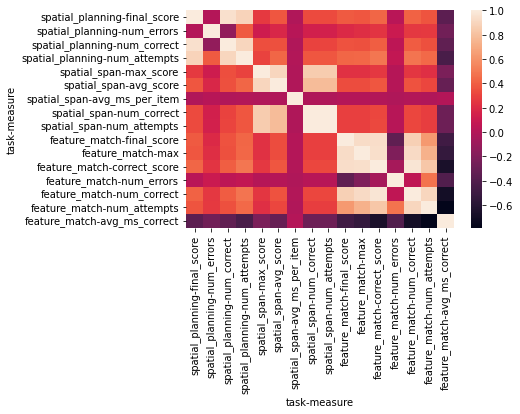

In [1]:
import seaborn as sns 
pd.set_option('display.max_rows', 100)
pd.set_option("display.max.columns", None)
df = pd.read_pickle('SYS_2022/data/raw/12_tasks.pkl')
tasks = df.xs(['spatial_planning','spatial_span','feature_match'],1).astype(float)
sns.heatmap(tasks.corr());

- Another common question relates to the level of completeness across the different metrics you acquired 
- If our objective is to increase the number of observation to the maximum it might be useful to identify the landscape of completeness across the tasks 
- Using the same heatmap plot together with pandas try to create the following plot that visualizes the per task completeness 

![](completeness.png)

- Once you have selected those create a selected set of summary plots that reflect any "interesting" questions that relate to potential association that you would like to investigate further 

- Add markdown section that bring your interpretation to the plot 